#### Installing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

#### Inserting Dataset 

In [2]:
data=pd.read_csv('RedWineQuality_Prediction.csv')

#### Check data samples
Let's look at a few data samples with head() method.

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

#### Data statistics
Let's use info() method to get quick description of data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


• Total entries: 1599
• There are total 12 columns: 11 features + 1 label
• Label column: quality
• Features: [fixed acidity, volitile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, alcohol]
• All columns are numeric and label is an integer.
• No variable column has null/missing values

In [6]:
data.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


• This one prints count and statistical properties - mean, standard deviations and quartiles.

• The wine quality can be between 0 and 10, but in this dataset, the quality values are between 3 and 8. Let's look at the   distribution of examples by the wine quality.

In [7]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

• High quality value --> better quality of wine
• see that there are lots of samples of average wines than good or the poor quality ones.
• Many examples with quality = 5 or 6

#### Visualization 

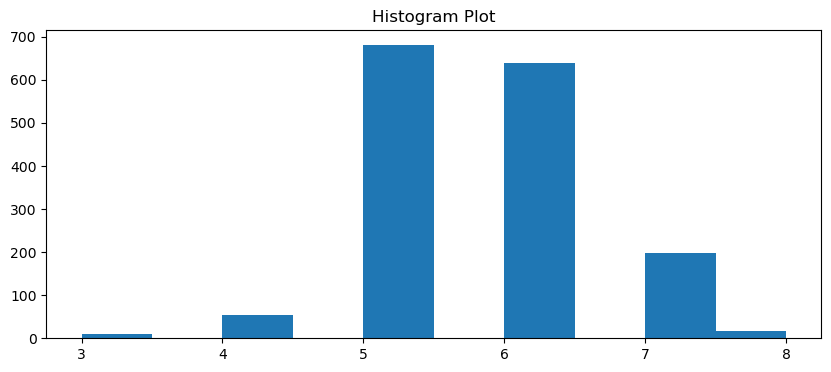

In [8]:
def hist_plots(data):
    plt.figure(figsize=(10, 4))
    plt.hist(data)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(data['quality'])

Text(0, 0.5, 'Wine Alcohol %')

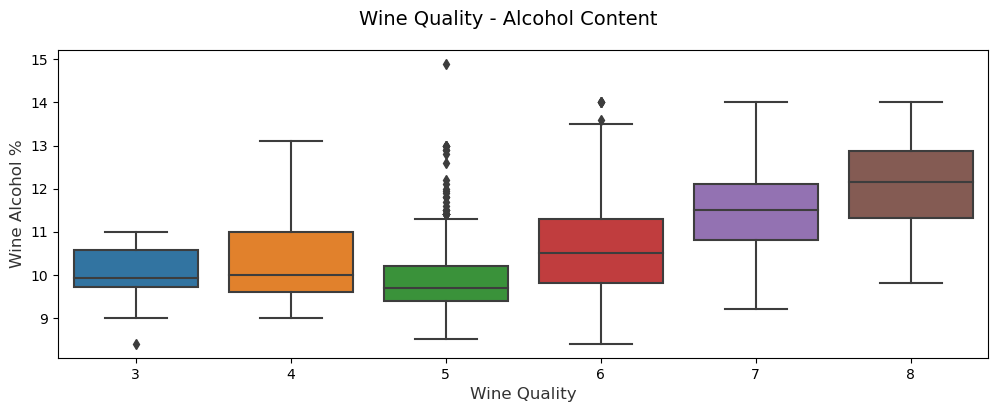

In [9]:
# Box Plots

f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=data,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Text(0.5, 1.05, 'Wine Sulphates - Alcohol Content')

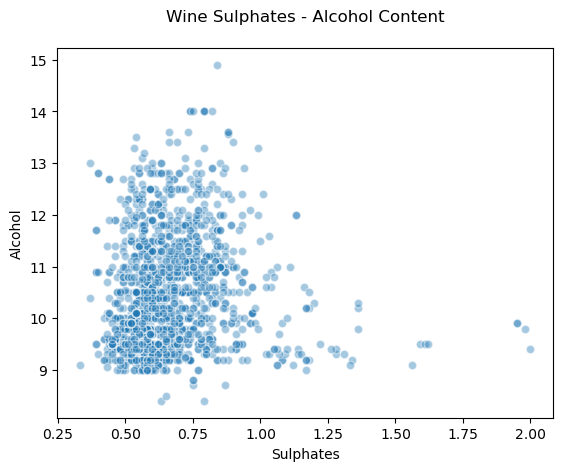

In [10]:
# Scatter Plot

plt.scatter(data['sulphates'], data['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)

Text(0.5, 0.98, 'Wine Attributes Correlation Heatmap')

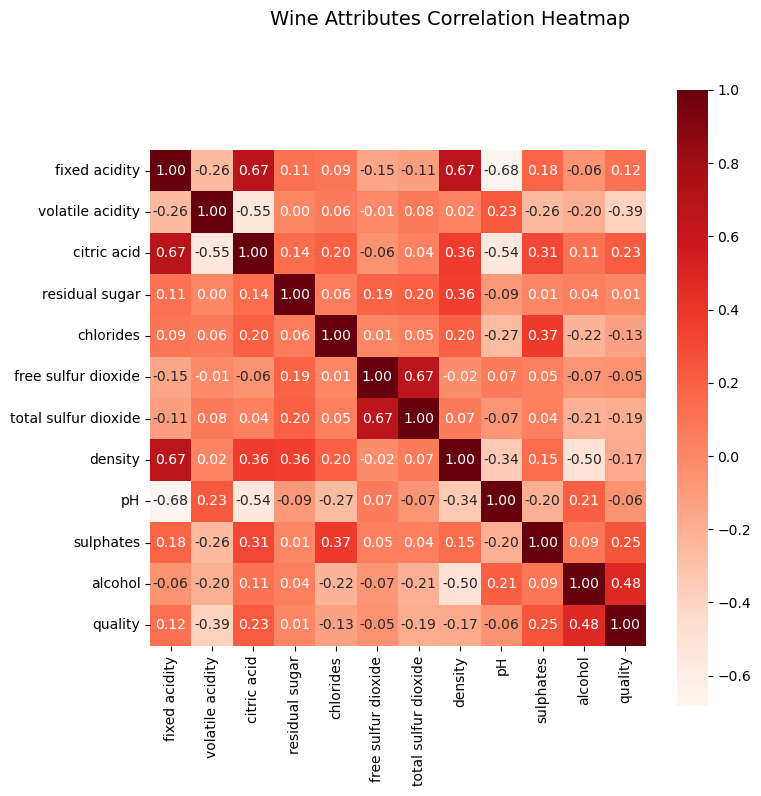

In [11]:
# Correlation Heatmap

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, cmap = 'Reds', fmt = '.2f', square=True)

plt.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

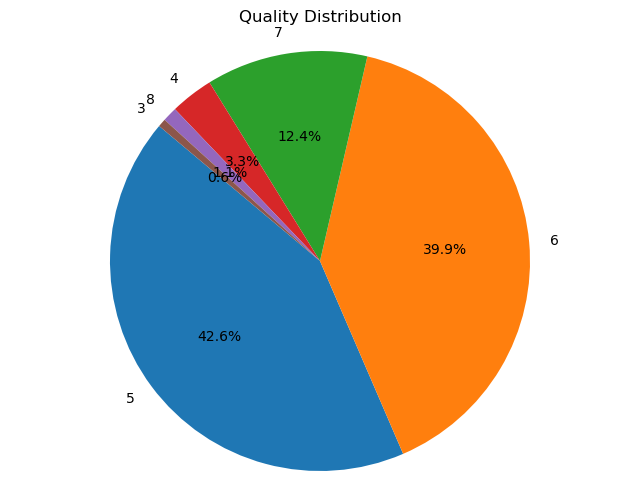

In [12]:
quality_counts = data['quality'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Quality Distribution',)
plt.axis('equal')
plt.show()

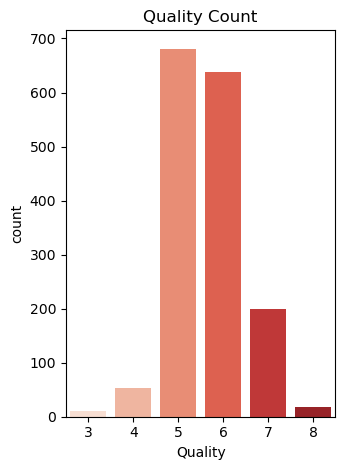

In [13]:
# Count plot
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='quality', palette='Reds')
plt.title('Quality Count')
plt.xlabel('Quality')

plt.tight_layout()
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

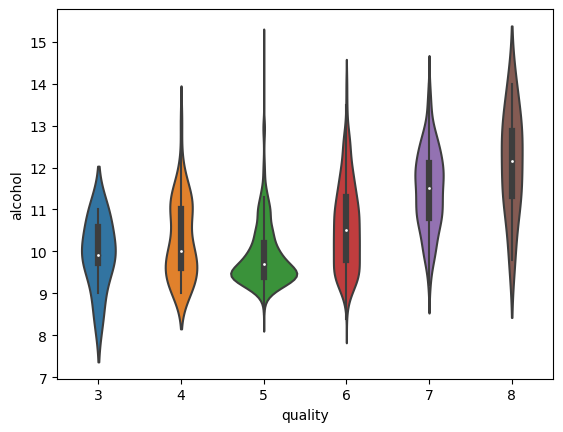

In [14]:
sns.violinplot(x="quality",y="alcohol",data=data)

#### Binarization of target variable 

In [15]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
data['quality']= [1 if x>= 7 else 0 for x in data['quality']]

In [20]:
data['quality'].unique()

array([0, 1], dtype=int64)

In [22]:
data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

#### Store feature matricx in X and response (target) in vector Y 

In [19]:
X = data.drop('quality',axis =1)
y = data['quality']

#### Splitting the dataset into the training and test set 

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#### Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test= st.transform(X_test)

In [26]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

### Logistic Regression 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred1 = log.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred1)

0.865625

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [43]:
precision_score(y_test,y_pred1)

0.5909090909090909

In [45]:
recall_score(y_test,y_pred1)

0.2765957446808511

In [46]:
f1_score(y_test,y_pred1)

0.37681159420289856

### SVC 

In [47]:
from sklearn import svm 

In [49]:
svm = svm.SVC()

In [50]:
svm.fit(X_train,y_train)

SVC()

In [51]:
y_pred2 = svm.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred2)

0.875

In [54]:
precision_score(y_test,y_pred2)

0.7058823529411765

In [55]:
f1_score(y_test,y_pred2)

0.37499999999999994

### KNeighbors Classifire 

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred3 = knn.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred3)

0.88125

In [62]:
precision_score(y_test,y_pred3)

0.6451612903225806

In [63]:
recall_score(y_test,y_pred3)

0.425531914893617

### Decision Tree Classifier 

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier()

In [66]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred4 = dt.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred4)

0.890625

In [71]:
precision_score(y_test,y_pred4)

0.6304347826086957

In [73]:
f1_score(y_test,y_pred4)

0.6236559139784946

### Random Forest Classifier 

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_pred5 = rf.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred5)

0.9

In [81]:
precision_score(y_test,y_pred5)

0.7272727272727273

In [82]:
f1_score(y_test,y_pred5)

0.5999999999999999

In [93]:
final_data =pd.DataFrame({'Models' : ['LR','SVC','KNN','DT','RF'],
              'ACC':[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,
                     accuracy_score(y_test,y_pred4)*100,
                     accuracy_score(y_test,y_pred5)*100]})
final_data
                    

,Models,ACC
0,LR,86.5625
1,SVC,87.5000
2,KNN,88.1250
3,DT,89.0625
4,RF,90.0000
